# Classification

## Objectives

*  Fit and evaluate a classification model to predict if a prospect will churn or not.

## Inputs

* outputs/datasets/collection/TelcoCustomerChurn.csv
* Instructions on which variables to use for data cleaning and feature engineering. They are found in each respective notebook.

## Outputs

* Train set (features and target)
* Test set (features and target)
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* Feature importance plot



---

# Change working directory

Change the working directory from its current folder to its parent folder


In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction/jupyter_notebooks'

Make the parent of the current directory the new current directory.


In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Film_Hit_prediction'

---

# Load Data 

Load Data

In [4]:
import pandas as pd
import pickle

# Load the splits for modeling
X_train = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/X_train.pkl')
X_test = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/X_test.pkl')
y_train = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/y_train.pkl')
y_test = pd.read_pickle('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/y_test.pkl')


print("Dataset shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Dataset shapes:
X_train shape: (3284, 269)
y_train shape: (3284,)
X_test shape: (813, 269)
y_test shape: (813,)


In [5]:
print("Current split ratio:")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/(X_train.shape[0] + X_test.shape[0]):.2%})")
print(f"Test samples: {X_test.shape[0]} ({X_test.shape[0]/(X_train.shape[0] + X_test.shape[0]):.2%})")

Current split ratio:
Training samples: 3284 (80.16%)
Test samples: 813 (19.84%)


---

# Step 2: ML Pipeline with all data

## ML Pipeline for Modelling and Hyperparameter Optimisation

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import RobustScaler

# Define models

models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {
            'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
            'solver': ['auto', 'svd', 'cholesky']
        }
    },
    'Lasso': {
        'model': Lasso(random_state=42),  
        'params': {
            'alpha': [0.1 ],  
            'max_iter': [500],
            'tol': [0.1], 
            'selection': ['cyclic'],  
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'n_jobs': [-1]
        }
    },
 
}


# Set up and train model

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import joblib

results = {}
best_models = {}

for name, model_info in models.items():
    print(f"\n{'='*50}")
    print(f"\nTraining {name}...")

    # GridSearchCV performs the hyperparameter optimization
    grid_search = GridSearchCV(
        model_info['model'],
        model_info['params'],
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs= 1 ,
        verbose=2
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train.ravel())
    best_models[name] = grid_search.best_estimator_




Training Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.6s


Training Ridge...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ............................alpha=0.01, solver=auto; total time=   0.3s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.4s
[CV] END ............................alpha=0.01, solver=auto; total time=   0.4s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.9s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.7s
[CV] END .............................alpha=0.01, solver=svd; total time=   0.8s
[CV] END ........................alpha=0.01, solver=cholesky; total time=   0.4s
[CV] END .........

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.252590539046583e+18, tolerance: 5.67584574577462e+18
  model = cd_fast.enet_coordinate_descent(


[CV] END .alpha=0.1, max_iter=500, selection=cyclic, tol=0.1; total time=   5.8s


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.153928139691237e+18, tolerance: 6.982214786800402e+18
  model = cd_fast.enet_coordinate_descent(


[CV] END .alpha=0.1, max_iter=500, selection=cyclic, tol=0.1; total time=   5.6s


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.856288922885383e+18, tolerance: 6.580600584278111e+18
  model = cd_fast.enet_coordinate_descent(


[CV] END .alpha=0.1, max_iter=500, selection=cyclic, tol=0.1; total time=   5.7s


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2071524145906051e+19, tolerance: 9.619486165716603e+18
  model = cd_fast.enet_coordinate_descent(




Training Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100, n_jobs=-1; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100, n_jobs=-1; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100, n_jobs=-1; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200, n_jobs=-1; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200, n_jobs=-1; total time=   1.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200, n_jobs=-1; total time=   1.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100, n_jobs=-1; total time=   0.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100, n_jobs=-1; total time=   0.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100, n_jobs=-1; total time=   0.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200, n_jobs=-1; total time

# Evaluate Performance

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import joblib


for name, model in best_models.items():
    print(f"\nTraining {name}...")

     # Make predictions
    y_pred = model.predict(X_test)
    
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'Best Parameters': grid_search.best_params_
    }
    
    # Print results
    print(f"\nResults for {name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print(f"Best Parameters: {grid_search.best_params_}")


Training Linear Regression...

Results for Linear Regression:
RMSE: 99064097.67
R2 Score: 0.66
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}

Training Ridge...

Results for Ridge:
RMSE: 98681577.29
R2 Score: 0.66
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}

Training Lasso...

Results for Lasso:
RMSE: 99063578.94
R2 Score: 0.66
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}

Training Random Forest...

Results for Random Forest:
RMSE: 80251568.30
R2 Score: 0.78
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}


# Save Best Performing Model

In [9]:
import os
import joblib

# 1. First identify the best model
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = best_models[best_model_name]

print(f"\nBest performing model: {best_model_name}")
print(f"Best model RMSE: {results[best_model_name]['RMSE']:.2f}")

# 2. Set up the save directory
save_dir = '/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/models'
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# 3. Create the filename with model name and date
from datetime import datetime
current_date = datetime.now().strftime("%Y%m%d")
model_filename = f'film_revenue_model_{best_model_name}_{current_date}.joblib'
full_path = os.path.join(save_dir, model_filename)

# 4. Save the model
joblib.dump(best_model, full_path)

print(f"\nBest model saved as: {model_filename}")
print("Model and scalers saved successfully!")
print("Best model saved successfully!")



Best performing model: Random Forest
Best model RMSE: 80251568.30

Best model saved as: film_revenue_model_Random Forest_20250115.joblib
Model and scalers saved successfully!
Best model saved successfully!


## Assess feature importance

Loaded model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>

Top 10 Most Important Features:
                    Feature  Importance
132                  budget    0.596860
104              popularity    0.176904
73                  runtime    0.067394
227       budget_per_minute    0.032615
27   company_DreamWorks SKG    0.012313
257    other_producer_count    0.009475
267       other_actor_count    0.009261
195    other_director_count    0.005521
245                   Drama    0.003149
126         Science Fiction    0.002828


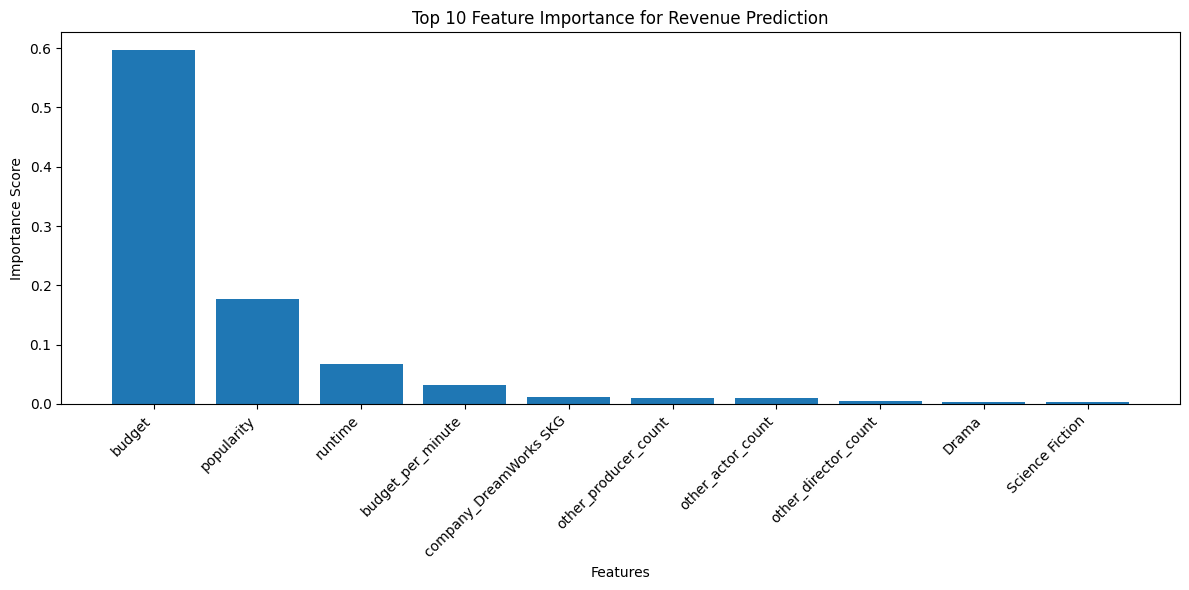

In [10]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved Random Forest model
model_path = '/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/models/film_revenue_model.joblib'
loaded_model = joblib.load(model_path)

print("Loaded model type:", type(loaded_model))


# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': loaded_model.feature_importances_
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot the top 10 feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance for Revenue Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


# Prediction Model


Create a function to make predictions for new movies based on parameters:
-  budget (float): Movie budget in dollars
- language (str): Original language (e.g., 'en' for English)
- genres (list): List of genres (e.g., ['Action', 'Adventure'])
    
 Returns:
- float: Predicted revenue and profit

New model

In [14]:
import traceback
import pandas as pd
import numpy as np


def predict_movie_revenue(budget, runtime, genres, language, production_company, 
                         production_country, actor1, actor2, crew_director, 
                         crew_writer, crew_producer):
    try:
        print("Loading models and data...")
        
        # Load the trained model and existing data (keep your current loading code)
        model = joblib.load('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/models/film_revenue_model_Random Forest_20250115.joblib')
        
        # Add loading of additional required files
        with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/top_revenue_actors.pkl', 'rb') as f:
            actor_data = pickle.load(f)
        with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/top_revenue_directors.pkl', 'rb') as f:
            director_data = pickle.load(f)
        with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/top_revenue_writers.pkl', 'rb') as f:
            writer_data = pickle.load(f)
        with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/top_revenue_producers.pkl', 'rb') as f:
            producer_data = pickle.load(f)
        with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/full_transformation_data.pkl', 'rb') as f:
            transform_data = pickle.load(f)
        with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/cleaned/encoders_and_filters.pkl', 'rb') as f:
            transform_data = pickle.load(f)

        # Ensure X_train and X_test are used directly (already loaded)
        print(f"X_train shape: {X_train.shape}")
        print(f"y_train shape: {y_train.shape}")

        return {
            'train_df': train_df,
            'test_df': test_df,
            'encoders': encoders,
            'eng_data': eng_data,
            'model': model,
            'feature_names': train_df.columns,
            'actor_data': actor_data,
            'director_data': director_data,
            'writer_data': writer_data,
            'producer_data': producer_data,
            'transform_data': transform_data
        }
    except Exception as e:
        print(f"Error loading models and data: {str(e)}")

        # Create initial features dictionary
        features = {col: 0 for col in transform_data['all_features']}
        
        # 1. Process budget features
        features['budget'] = budget
        features['runtime'] = runtime
        features['budget_per_minute'] = budget / runtime if runtime > 0 else 0
        
        # 2. Process genres
        for genre in transform_data['genre_columns']:
            features[genre] = 1 if genre in genres else 0
            
        # Process actors
        # Example: Define actor_cols (assuming columns in X_train start with 'cast_')
        actor_cols = [col for col in X_train.columns if col.startswith('cast_')]
        
        for col in actor_cols:
            actor_name = col.replace('cast_', '')
            is_in_movie = actor_name in [actor1, actor2]
            features[col] = 1 if is_in_movie else 0
            pop_weight_col = f"{col}_pop_weight"
            if is_in_movie and actor_name in actor_metrics:
                features[f"{col}_pop_weight"] = actor_metrics[actor_name]['avg_popularity']
         
                
        # 4. Process director
        if crew_director:
            for col in director_data['columns']:
                director_name = col.replace('crew_Director_', '')
                if director_name == crew_director:
                    features[col] = 1
                    if director_name in director_data['metrics']:
                        features[f"{col}_pop_weight"] = director_data['metrics'][director_name]['avg_popularity']

        if not director_found:
            for col in director_data['columns']:
                features[col] = 0
                features[f"{col}_pop_weight"] = 0 


        # Process producers
        if crew_producer:
            for col in producer_data['columns']:
                producer_name = col.replace('crew_Producer_', '')
                if producer_name == crew_producer:
                    features[col] = 1
                    if producer_name in producer_data['metrics']:
                        features[f"{col}_pop_weight"] = producer_data['metrics'][producer_name]['avg_popularity']

        if not producer_found:
            for col in producer_data['columns']:
                features[col] = 0
                features[f"{col}_pop_weight"] = 0                 
        
        # Process producers
        if crew_writer:
            for col in writer_data['columns']:
                producer_name = col.replace('crew_Writer_', '')
                if writer_name == crew_writer:
                    features[col] = 1
                    if writer_name in writer_data['metrics']:
                        features[f"{col}_pop_weight"] = writer_data['metrics'][writer_name]['avg_popularity']

            if not writer_found:
                for col in writer_data['columns']:
                    features[col] = 0
                    features[f"{col}_pop_weight"] = 0 
        
        
        # 6. Create DataFrame
        pred_df = pd.DataFrame([features])
        
        # 7. Scale numerical features
        numeric_cols = transform_data['numeric_cols']
        pred_df[numeric_cols] = transform_data['feature_scaler'].transform(pred_df[numeric_cols])

        # Ensure correct column order
        pred_df = pred_df[transform_data['all_features']]
        '''
        # 8. Ensure all features are present in correct order
        for feature in transform_data['all_features']:
            if feature not in pred_df.columns:
                pred_df[feature] = 0
        '''
        
        # Make prediction
        raw_prediction = model.predict(pred_df)[0]
        
        # Unscale prediction
        predicted_revenue = (raw_prediction * transform_data['train_stats']['revenue_std'] + 
                           transform_data['train_stats']['revenue_mean'])
        predicted_revenue = max(0, predicted_revenue)
        
        return {
            'revenue': predicted_revenue,
            'profit': predicted_revenue - budget,
            'roi': ((predicted_revenue - budget) / budget * 100) if budget > 0 else 0,
            'is_profitable': predicted_revenue > budget
        }
        
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        traceback.print_exc()
        return None

In [15]:
# Example usage
if __name__ == "__main__":
    test_movie = {
        'budget': 150000000,
        'runtime': 120,
        'genres': ['Action'],
        'language': 'en',
        'production_company': 'Marvel Studios',
        'production_country': 'US',
        'actor1': 'Chris Hemsworth',
        'actor2': 'Brad Pitt',
        'crew_director': 'Joss Whedon',
        'crew_writer': 'Joss Whedon',
        'crew_producer': 'Kevin Feige'
    }
    
    result = predict_movie_revenue(**test_movie)
    
    if result is not None:
        print("\nPredicted Results:")
        print(f"\nPredicted Revenue: ${result['revenue']:,.2f}")
        print(f"Predicted Profit/Loss: ${result['profit']:,.2f}")
        print(f"ROI: {result['roi']:.1f}%")
        print(f"Is Profitable: {'Yes' if result['is_profitable'] else 'No'}")

Loading models and data...
X_train shape: (3284, 269)
y_train shape: (3284,)
Error loading models and data: name 'train_df' is not defined


NameError: name 'actor_cols' is not defined

# Evaluation


Load model

In [ ]:
import joblib

model_path = "/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/models/"  
model = joblib.load(model_path + 'film_revenue_model.joblib')

print("Model loaded:", type(model))


Make predictions on test data 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load test and train data
with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

# Load X_test if not already loaded
with open('/workspace/Film_Hit_prediction/jupyter_notebooks/outputs/engineered/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

# Get predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f'Root Mean Squared Error: ${rmse:,.2f}')
print(f'Mean Absolute Error: ${mae:,.2f}')
print(f'R² Score: {r2:.4f}')

# Calculate percentage error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')





Visualizations

In [ ]:
# Visualization of predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Predicted vs Actual Revenue')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

Additional analysis

In [ ]:


# Additional analysis
print("\nResiduals Analysis:")
print(f"Mean of residuals: ${residuals.mean():,.2f}")
print(f"Standard deviation of residuals: ${residuals.std():,.2f}")
print(f"Skewness of residuals: {residuals.skew():.2f}")

# Sample predictions
comparison_df = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue': y_pred,
    'Absolute Error': np.abs(y_test - y_pred),
    'Percentage Error': np.abs((y_test - y_pred) / y_test) * 100
})

print("\nSample Predictions (first 5 movies):")
print(comparison_df.head().to_string())